# Preparing for ISF '21
### Results analysis and graphing
---

## Plumbing

In [1]:
import sys
import os

import importlib
is_colab = importlib.util.find_spec("google")
found = is_colab is not None

import_path = ''
if found:
    from google.colab import drive
    drive.mount('/content/gdrive/', force_remount=True)
    import_path += '/content/gdrive/My Drive/Thesis/pairs/'

else:
    import_path += 'data/pairs/'

print(import_path)

data/pairs/


In [2]:
from utils.subsets import *
from utils.simulations import cumret

In [3]:
import pickle
oneyr = pickle.load(open('data/raw/26-coins_1D-returns.pkl', 'rb'))
twoyr = pickle.load(open('data/raw/14-coins_1D-returns.pkl', 'rb'))

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use("ggplot")

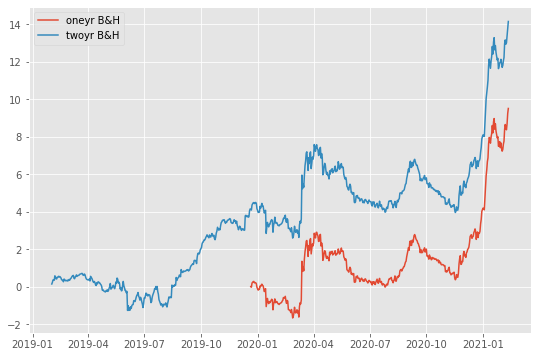

In [5]:
oneyravg = oneyr.mean(axis=1)
twoyravg = twoyr.mean(axis=1)

fig = plt.figure(figsize=(9,6))
plt.plot(cumret(oneyravg), label='oneyr B&H')
plt.plot(cumret(twoyravg), label="twoyr B&H")
plt.legend()
plt.show()

In [6]:
# 14 & 147, 26 & 83
one_yr_res = []
two_yr_res = []
import_path = 'results/pickle/'
for dirname, _, filenames in os.walk(import_path):
        for filename in filenames:
            if '.pkl' in filename:
                try:
                    res = pickle.load(open(import_path + filename, 'rb'))
                except EOFError:
                    print(f"EOFError on {filename}")
                    continue
                f = filename.split('.')[0]
                yhat = res.get_predictions()
                if yhat.shape == (83, 26):
                    one_yr_res.append(res)
                    rets = res.cumulative_portfolio_returns()
#                     print(f"{f.split('_')}: {yhat.shape[0]}")
#                     print(f"{f.split('_')}: {rets.iloc[-1]}")
#                     print()
                elif yhat.shape == (147, 14):
                    two_yr_res.append(res)
                    rets = res.cumulative_portfolio_returns()
#                     print(f"{f.split('_')}: {yhat.shape[0]}")
#                     print(f"{f.split('_')}: {rets.iloc[-1]}")
#                     print()

EOFError on 2021-06-18_14:54:44-retrain(1)-14Coins-AE(2)_20LSTMs(4).pkl


In [7]:
from utils.plotting import plot_portfolio_sims

oneyrmodels = {}
for res in one_yr_res:
#     print(res.get_model_name())
    oneyrmodels[res.get_model_name()] = []
for res in one_yr_res:
    oneyrmodels[res.get_model_name()].append(res)

print(oneyrmodels.keys())

print()
print('----------------------')
print()

twoyrmodels = {}
for res in two_yr_res:
#     print(res.get_model_name())
    twoyrmodels[res.get_model_name()] = []
for res in two_yr_res:
    twoyrmodels[res.get_model_name()].append(res)

print(twoyrmodels.keys())

dict_keys(['Auto-Regressive Moving-Average (1, 1) latent variable model', 'Multivariate PCA(2)-LSTM(4,6)', 'AE(2,200)-LSTM(4,6)', 'AE(2,200)-MultiModel(20)LSTMs(4,6)', 'AE(2,200)-FFNN(15,6)', 'Auto-Regressive (1) latent variable model', 'LASSO_alpha-0.1'])

----------------------

dict_keys(['AE(2,200)-FFNN(15,6)', 'AE(2,200)-MultiModel(20)LSTMs(4,6)', 'AE(2,200)-LSTM(4,6)', 'LASSO_alpha-0.1', 'Multivariate PCA(2)-LSTM(4,6)', 'Auto-Regressive (1) latent variable model', 'Auto-Regressive Moving-Average (1, 1) latent variable model', 'AE(2,200)-MultiModel(10)LSTMs(4,6)'])


----
# Top 14 coins (two years of available data)

In [31]:
two_mvpcalstm = twoyrmodels['Multivariate PCA(2)-LSTM(4,6)'] 
two_aelstm = twoyrmodels['AE(2,200)-LSTM(4,6)'] 
two_aemmlstm = twoyrmodels['AE(2,200)-MultiModel(20)LSTMs(4,6)'] 
two_ar = twoyrmodels['Auto-Regressive (1) latent variable model'] 
two_arma = twoyrmodels['Auto-Regressive Moving-Average (1, 1) latent variable model'] 
two_ffnn = twoyrmodels['AE(2,200)-FFNN(15,6)'] 
two_lasso = twoyrmodels['LASSO_alpha-0.1']

In [9]:
models_results = [two_mvpcalstm, two_aelstm, two_ar, two_arma, two_ffnn, two_lasso]
buy_and_hold = []
for arr_i, arr in enumerate(models_results):
    min_rmse = np.Inf
    rmse_i = 999
    max_ret = 0
    ret_i = 999
    max_sharpe = 0
    sharpe_i = 999
    count = 0
    for i, m in enumerate(arr):
        if arr_i == 0 and i == 0: buy_and_hold = m.get_buy_and_hold()
        cumret = m.cumulative_portfolio_returns().iloc[-1]
        rmse = m.get_rmse()
        sharpe = m.get_sharpe()
        if rmse < min_rmse:
            rmse_i = i
            min_rmse = rmse
        if cumret > max_ret:
            ret_i = i
            max_ret = cumret
        if sharpe > max_sharpe:
            sharpe_i = i
            max_sharpe = sharpe
        count +=1
    print(f'{count}-total simulations')
    print(f'Arr at entry {arr_i}:')
    print(f'Max ret = {max_ret} @ entry {ret_i}')
    print(f'Min rmse = {min_rmse} @ entry {rmse_i}')
    print(f'Max Sharpe = {max_sharpe} @ entry {sharpe_i}')
    print()

42-total simulations
Arr at entry 0:
Max ret = 2.782465405716694 @ entry 29
Min rmse = 0.03997050523053221 @ entry 18
Max Sharpe = 6.104550032490581 @ entry 29

47-total simulations
Arr at entry 1:
Max ret = 8.035745474475654 @ entry 43
Min rmse = 0.00010429333577912853 @ entry 34
Max Sharpe = 42.97339131104289 @ entry 43

23-total simulations
Arr at entry 2:
Max ret = 8.228687999803919 @ entry 4
Min rmse = 9.693713068071839e-06 @ entry 13
Max Sharpe = 38.09098032623299 @ entry 4

23-total simulations
Arr at entry 3:
Max ret = 6.8708730620426595 @ entry 13
Min rmse = 9.777997686012542e-06 @ entry 20
Max Sharpe = 28.95558715530473 @ entry 13

47-total simulations
Arr at entry 4:
Max ret = 7.5836635824139575 @ entry 28
Min rmse = 1.0851310586740408e-05 @ entry 22
Max Sharpe = 39.30630161068713 @ entry 28

17-total simulations
Arr at entry 5:
Max ret = 9.847932015637939 @ entry 8
Min rmse = 9.620358448166624e-06 @ entry 14
Max Sharpe = 37.27584743012252 @ entry 8



In [10]:
buy_and_hold

open_time
2020-09-18   -0.000908
2020-09-19   -0.001204
2020-09-20   -0.000991
2020-09-21   -0.003247
2020-09-22    0.001052
                ...   
2021-02-07   -0.002014
2021-02-08    0.000671
2021-02-09    0.003511
2021-02-10    0.004088
2021-02-11    0.002416
Freq: D, Length: 147, dtype: float32

In [11]:
models = ["AR(1)", "ARMA(1,1)", "LASSO", "PCALSTM", "FFNN", "AELSTM"]
arrs = [two_ar, two_arma, two_lasso, two_mvpcalstm, two_ffnn, two_aemmlstm]

modnames, rmses, cumrets, sharpes = [], [], [], []

for i, model in enumerate(models):
    for j, m in enumerate(arrs[i]):
        modnames.append(model)
        rmses.append(m.get_rmse())
        cumrets.append(m.cumulative_portfolio_returns().iloc[-1])
        sharpes.append(m.get_sharpe())
        
twoyrdf = pd.DataFrame({"Model":modnames, "RMSE": rmses, "Cumulative Return": cumrets, "Sharpe": sharpes})

In [12]:
twoyrdf

,Model,RMSE,Cumulative Return,Sharpe
0,AR(1),0.000010,4.018450,10.902579
1,AR(1),0.000010,4.637237,15.376419
2,AR(1),0.000010,4.234874,12.005415
3,AR(1),0.000010,6.373200,25.600422
4,AR(1),0.000010,8.228688,38.090980
...,...,...,...,...
168,AELSTM,0.000015,5.125928,25.881482
169,AELSTM,0.000019,4.995576,24.860560
170,AELSTM,0.000016,4.504675,20.017693
171,AELSTM,0.000018,3.330080,9.945325


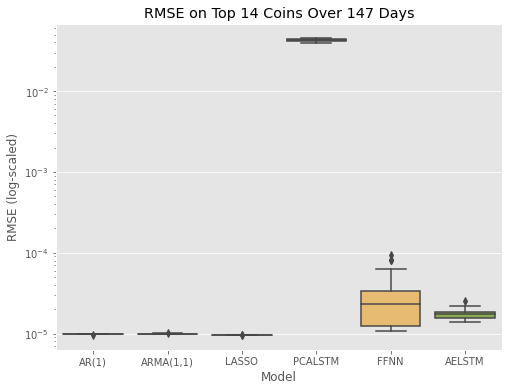

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Model', y='RMSE', data=twoyrdf[(twoyrdf != 'PCALSTM').any(axis=1)])
# sns.swarmplot(x='Model', y='RMSE', data=twoyrdf)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("RMSE on Top 14 Coins Over 147 Days")
plt.yscale('log')
plt.ylabel("RMSE (log-scaled)")
plt.show()

In [14]:
cleaner_twoyrdf = twoyrdf.loc[~twoyrdf['Model'].isin(['PCALSTM'])]

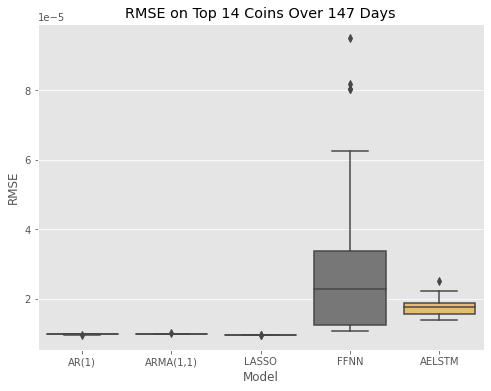

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Model', y='RMSE', data=cleaner_twoyrdf)
# sns.swarmplot(x='Model', y='RMSE', data=twoyrdf)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("RMSE on Top 14 Coins Over 147 Days")
# plt.yscale('log')
plt.show()

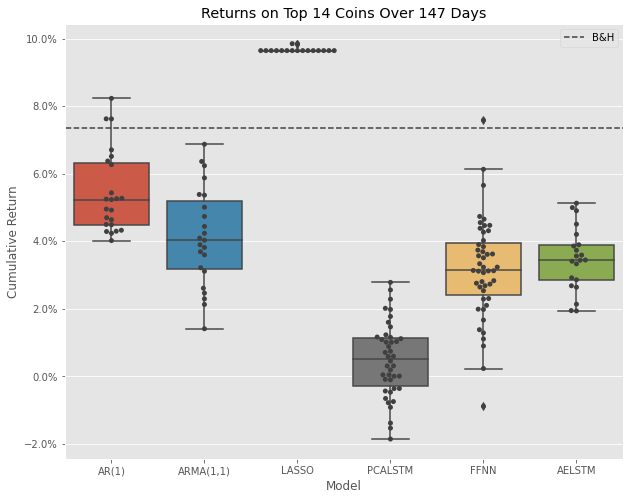

In [16]:
y = 7.35
x1, x2 = -1, 10

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Model', y='Cumulative Return', data=twoyrdf)
sns.swarmplot(x='Model', y='Cumulative Return', data=twoyrdf, color=".25")
plt.plot([x1, x2], [y, y], '--', color='0.25', label='B&H')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Returns on Top 14 Coins Over 147 Days")
plt.legend()
# plt.yscale('log')
plt.show()

In [23]:
from utils.plotting import cumret as calc_cumret
# Calculate the portfolio_returns and their standard deviation
rets = buy_and_hold
crets = calc_cumret(buy_and_hold)
std = np.std(rets)
sim_return = (crets.iloc[-1] - 1) / 100

# Calculate the risk free return over the period
periods_per_day = 1
risk_free_rate_apy = 0.03
daily_rfr = risk_free_rate_apy / 365
n_days = len(rets) / periods_per_day
rfr = daily_rfr * n_days

bnh_sharpe = (sim_return - rfr) / std 
print(f'Buy and Hold Sharpe: {bnh_sharpe}')

Buy and Hold Sharpe: 22.416954522644787


/Users/Matt/miniconda3/envs/CCM/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


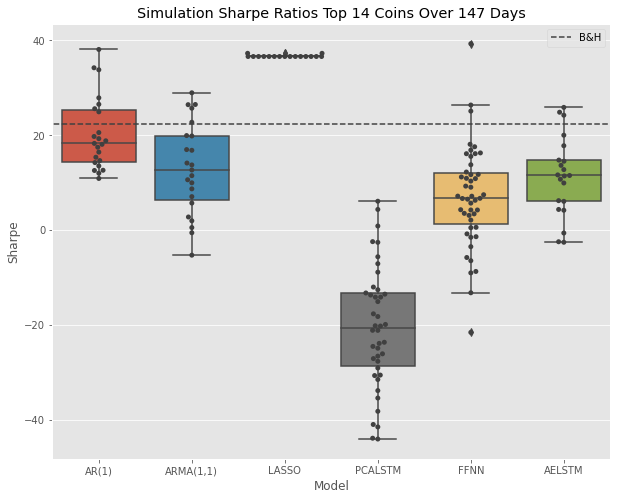

In [25]:
y = bnh_sharpe
x1, x2 = -1, 10

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Model', y='Sharpe', data=twoyrdf)
sns.swarmplot(x='Model', y='Sharpe', data=twoyrdf, color=".25")
plt.plot([x1, x2], [y, y], '--', color='0.25', label='B&H')
plt.title("Simulation Sharpe Ratios Top 14 Coins Over 147 Days")
plt.legend()
# plt.yscale('log')
plt.show()

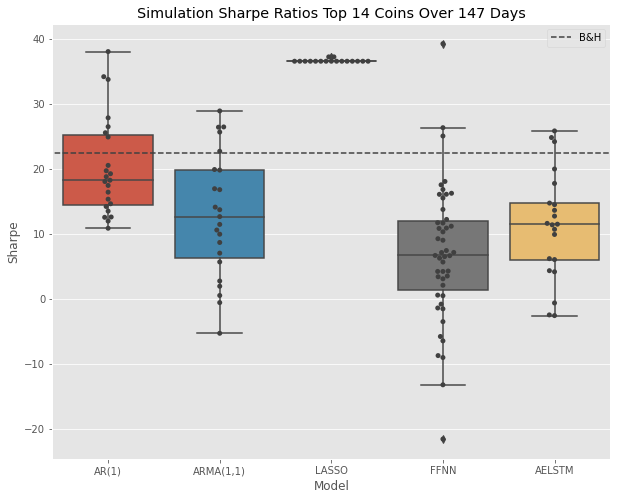

In [27]:
y = bnh_sharpe
x1, x2 = -1, 10

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Model', y='Sharpe', data=cleaner_twoyrdf)
sns.swarmplot(x='Model', y='Sharpe', data=cleaner_twoyrdf, color=".25")
plt.plot([x1, x2], [y, y], '--', color='0.25', label='B&H')
plt.title("Simulation Sharpe Ratios Top 14 Coins Over 147 Days")
plt.legend()
# plt.yscale('log')
plt.show()

-----
# Top 26 coins (one year of available historical data)

In [32]:
one_mvpcalstm = oneyrmodels['Multivariate PCA(2)-LSTM(4,6)'] 
one_aelstm = oneyrmodels['AE(2,200)-LSTM(4,6)'] 
one_lasso = oneyrmodels['LASSO_alpha-0.1']
one_ffn = oneyrmodels['AE(2,200)-FFNN(15,6)']
one_aemmlstm = oneyrmodels['AE(2,200)-MultiModel(20)LSTMs(4,6)'] 
one_ar = oneyrmodels['Auto-Regressive (1) latent variable model'] 
one_arma = oneyrmodels['Auto-Regressive Moving-Average (1, 1) latent variable model'] 

In [33]:
models_results = [one_mvpcalstm, one_aelstm, one_lasso, two_arma, one_ar, one_aemmlstm]
buy_and_hold = []
for arr_i, arr in enumerate(models_results):
    min_rmse = np.Inf
    rmse_i = 999
    max_ret = 0
    ret_i = 999
    max_sharpe = 0
    sharpe_i = 999
    count = 0
    for i, m in enumerate(arr):
        if arr_i == 0 and i == 0: buy_and_hold = m.get_buy_and_hold()
        cumret = m.cumulative_portfolio_returns().iloc[-1]
        rmse = m.get_rmse()
        sharpe = m.get_sharpe()
        if rmse < min_rmse:
            rmse_i = i
            min_rmse = rmse
        if cumret > max_ret:
            ret_i = i
            max_ret = cumret
        if sharpe > max_sharpe:
            sharpe_i = i
            max_sharpe = sharpe
        count +=1
    print(f'{count}-total simulations')
    print(f'Arr at entry {arr_i}:')
    print(f'Max ret = {max_ret} @ entry {ret_i}')
    print(f'Min rmse = {min_rmse} @ entry {rmse_i}')
    print(f'Max Sharpe = {max_sharpe} @ entry {sharpe_i}')
    print()

18-total simulations
Arr at entry 0:
Max ret = 1.7037142031483876 @ entry 8
Min rmse = 0.054233753877774266 @ entry 6
Max Sharpe = 0.3280028170998708 @ entry 8

18-total simulations
Arr at entry 1:
Max ret = 4.286689724369297 @ entry 17
Min rmse = 0.0012256443633575768 @ entry 14
Max Sharpe = 18.044082069047647 @ entry 17

6-total simulations
Arr at entry 2:
Max ret = 8.19660550843546 @ entry 0
Min rmse = 1.719437142068922e-05 @ entry 2
Max Sharpe = 28.45370812813332 @ entry 0

23-total simulations
Arr at entry 3:
Max ret = 6.8708730620426595 @ entry 13
Min rmse = 9.777997686012542e-06 @ entry 20
Max Sharpe = 28.95558715530473 @ entry 13

8-total simulations
Arr at entry 4:
Max ret = 1.6273666830224798 @ entry 4
Min rmse = 1.760704177304023e-05 @ entry 4
Max Sharpe = 0 @ entry 999

15-total simulations
Arr at entry 5:
Max ret = 2.288081018166066 @ entry 1
Min rmse = 5.486769402087229e-05 @ entry 3
Max Sharpe = 5.566528948393358 @ entry 1



In [41]:
models = ["AR(1)", "ARMA(1,1)", "LASSO", "PCALSTM", "FFNN", "AELSTM"]
arrs = [one_ar, one_arma, one_lasso, one_mvpcalstm, one_ffnn, one_aemmlstm]

modnames, rmses, cumrets, sharpes = [], [], [], []

for i, model in enumerate(models):
    for j, m in enumerate(arrs[i]):
        modnames.append(model)
        rmses.append(m.get_rmse())
        cumrets.append(m.cumulative_portfolio_returns().iloc[-1])
        sharpes.append(m.get_sharpe())
        
oneyrdf = pd.DataFrame({"Model":modnames, "RMSE": rmses, "Cumulative Return": cumrets, "Sharpe": sharpes})

NameError: name 'one_ffnn' is not defined

In [35]:
oneyrdf

,Model,RMSE,Cumulative Return,Sharpe
0,AR(1),0.000010,4.018450,10.902579
1,AR(1),0.000010,4.637237,15.376419
2,AR(1),0.000010,4.234874,12.005415
3,AR(1),0.000010,6.373200,25.600422
4,AR(1),0.000010,8.228688,38.090980
...,...,...,...,...
168,AELSTM,0.000015,5.125928,25.881482
169,AELSTM,0.000019,4.995576,24.860560
170,AELSTM,0.000016,4.504675,20.017693
171,AELSTM,0.000018,3.330080,9.945325


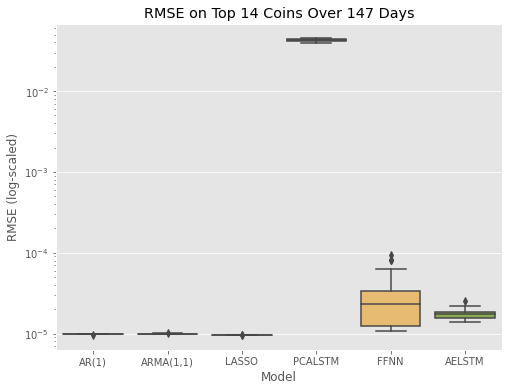

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Model', y='RMSE', data=twoyrdf[(twoyrdf != 'PCALSTM').any(axis=1)])
# sns.swarmplot(x='Model', y='RMSE', data=twoyrdf)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("RMSE on Top 14 Coins Over 147 Days")
plt.yscale('log')
plt.ylabel("RMSE (log-scaled)")
plt.show()

In [37]:
cleaner_twoyrdf = twoyrdf.loc[~twoyrdf['Model'].isin(['PCALSTM'])]

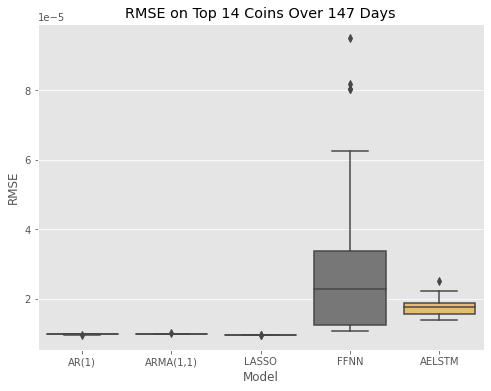

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Model', y='RMSE', data=cleaner_twoyrdf)
# sns.swarmplot(x='Model', y='RMSE', data=twoyrdf)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("RMSE on Top 14 Coins Over 147 Days")
# plt.yscale('log')
plt.show()

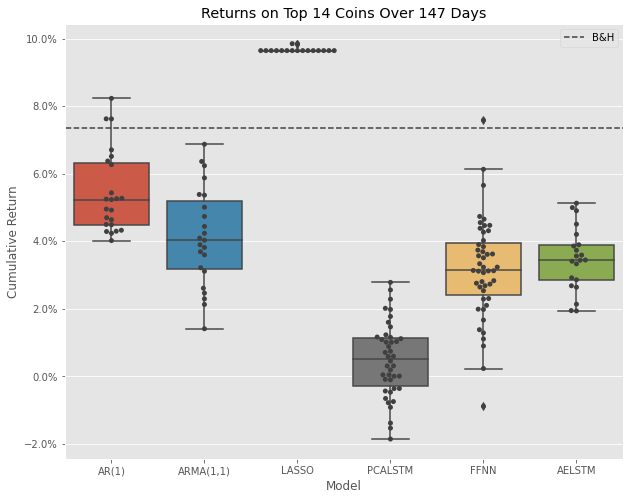

In [39]:
y = 7.35
x1, x2 = -1, 10

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Model', y='Cumulative Return', data=twoyrdf)
sns.swarmplot(x='Model', y='Cumulative Return', data=twoyrdf, color=".25")
plt.plot([x1, x2], [y, y], '--', color='0.25', label='B&H')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Returns on Top 14 Coins Over 147 Days")
plt.legend()
# plt.yscale('log')
plt.show()

In [40]:
from utils.plotting import cumret as calc_cumret
# Calculate the portfolio_returns and their standard deviation
rets = buy_and_hold
crets = calc_cumret(buy_and_hold)
std = np.std(rets)
sim_return = (crets.iloc[-1] - 1) / 100

# Calculate the risk free return over the period
periods_per_day = 1
risk_free_rate_apy = 0.03
daily_rfr = risk_free_rate_apy / 365
n_days = len(rets) / periods_per_day
rfr = daily_rfr * n_days

bnh_sharpe = (sim_return - rfr) / std 
print(f'Buy and Hold Sharpe: {bnh_sharpe}')

Buy and Hold Sharpe: 27.491748023630603


/Users/Matt/miniconda3/envs/CCM/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


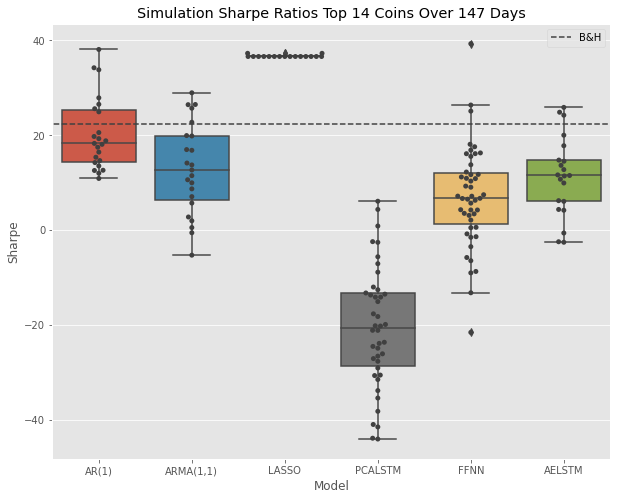

In [25]:
y = bnh_sharpe
x1, x2 = -1, 10

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Model', y='Sharpe', data=twoyrdf)
sns.swarmplot(x='Model', y='Sharpe', data=twoyrdf, color=".25")
plt.plot([x1, x2], [y, y], '--', color='0.25', label='B&H')
plt.title("Simulation Sharpe Ratios Top 14 Coins Over 147 Days")
plt.legend()
# plt.yscale('log')
plt.show()

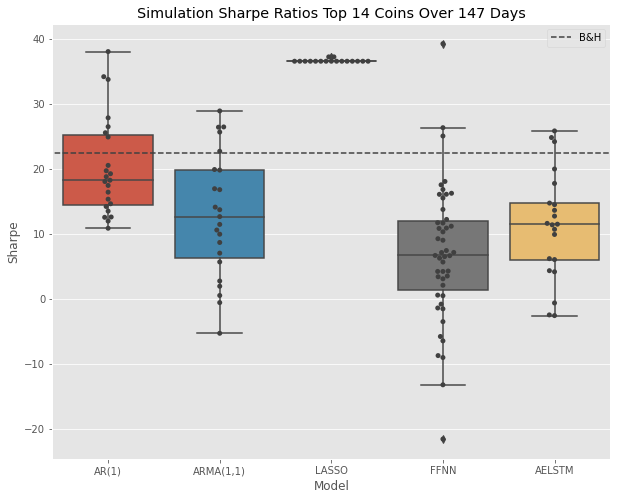

In [27]:
y = bnh_sharpe
x1, x2 = -1, 10

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='Model', y='Sharpe', data=cleaner_twoyrdf)
sns.swarmplot(x='Model', y='Sharpe', data=cleaner_twoyrdf, color=".25")
plt.plot([x1, x2], [y, y], '--', color='0.25', label='B&H')
plt.title("Simulation Sharpe Ratios Top 14 Coins Over 147 Days")
plt.legend()
# plt.yscale('log')
plt.show()